# KAIST Summer Session 2018

## Neural Network (08.16.2018)

1. Training a Single Neuron
    - Linear regression + Step function


2. Multilayer Perceptrons (= Deep Neural Networks)
    - Go Wide & Go Deep


3. Multi-class Output

### 0. Data Preparation

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('linear regression.xlsx')
a= df.as_matrix()

np.set_printoptions(suppress=True)

y = np.array([a[:,6]]).astype('float').T
x = np.array([a[:,1]]).astype('float').T
x_wide = np.array([a[:,1],a[:,2],a[:,3],a[:,4],a[:,5]]).astype('float').T
y_wide = np.array([a[:,6],a[:,7]]).astype('float').T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### 1. Training a Single Neuron
- Linear regression + Step function

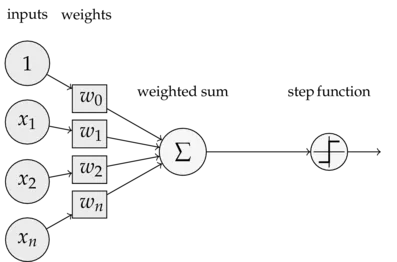

##### PyTorch style

    1) Design your model as a class using tensor

    2) Set the loss and optimizer (from PyTorch API)

    3) Conduct the training cycle (forward, backward, update)

In [2]:
import torch
import torch.nn.functional as F

torch.manual_seed(777)  # reproducibility


class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        # Linear + Step function
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
    
# Instantiate the model    
model = Model()


# Set loss and optimizer function
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    x_data = torch.from_numpy(x).float()
    y_pred = model(x_data)

    # Compute and print loss
    y_data = torch.from_numpy(y).float()
    loss = criterion(y_pred, y_data)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
print('\npredict (after training)')
print('If mileage is {}, the probability of high price is {}'. format(25, model(torch.tensor([25.0])).item()))
print('If mileage is {}, the probability of high price is {}'. format(5, model(torch.tensor([5.0])).item()))


predict (after training)
If mileage is 25, the probability of high price is 0.11826063692569733
If mileage is 5, the probability of high price is 0.40993592143058777


### 2. Mulilayer Perceptrons (= Deep Neural Networks)
- Go Deep & Go Wide

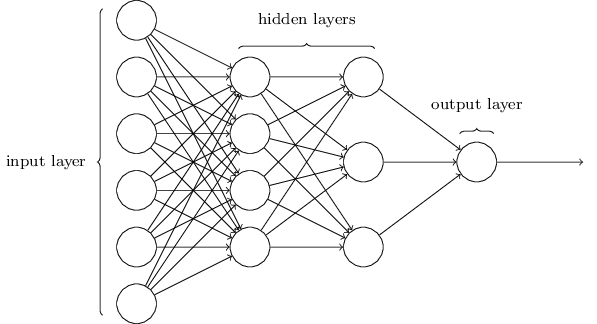

In [3]:
class Neural(torch.nn.Module):

    def __init__(self):
        super(Neural, self).__init__()
        # Go Wide & Go Deep
        self.l1 = torch.nn.Linear(5, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        x = torch.sigmoid(self.l3(x))
        return x
    
# Instantiate the model    
neural_model = Neural()


# Set loss and optimizer function
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(neural_model.parameters(), lr=0.001)


# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    x_data_wide = torch.from_numpy(x_wide).float()
    y_pred = neural_model(x_data_wide)

    # Compute and print loss
    y_data = torch.from_numpy(y).float()
    loss = criterion(y_pred, y_data)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
print('\npredict (after training)')
print('the probability of high price is {}'. format(neural_model(torch.tensor([25.0, 15.0, 3000.0, 200.0, 1])).item()))


predict (after training)
the probability of high price is 0.34529343247413635


### 3. Multi-class Output

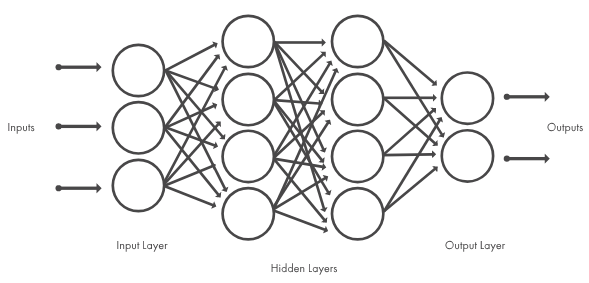

In [4]:
class Neural2(torch.nn.Module):

    def __init__(self):
        super(Neural2, self).__init__()
        self.l1 = torch.nn.Linear(5, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 2)   # neural networks yield two outputs 

    def forward(self, x):
        x = torch.sigmoid(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        x = torch.sigmoid(self.l3(x))
        return x
    
    
neural_model2 = Neural2()


# Construct our loss function and an Optimizer
# Cross entory loss function is used for multi-class classification
criterion = torch.nn.CrossEntropyLoss()    
optimizer = torch.optim.SGD(neural_model2.parameters(), lr=0.001)


# Training loop
for epoch in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    x_data_wide = torch.from_numpy(x_wide).float()
    y_pred = neural_model2(x_data_wide)
    # Compute and print loss
    y_data_wide = torch.from_numpy(y_wide)
    loss = criterion(y_pred, torch.max(y_data_wide, 1)[1])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
# After training
print('\npredict (after training)')
print('the probability of high price is {}'. format(neural_model2(torch.tensor([25.0, 15.0, 3000.0, 200.0, 1]))[0]))
print('the probability of low price is {}'. format(neural_model2(torch.tensor([25.0, 15.0, 3000.0, 200.0, 1]))[1]))


predict (after training)
the probability of high price is 0.6176871657371521
the probability of low price is 0.4578319787979126


- Softmax function

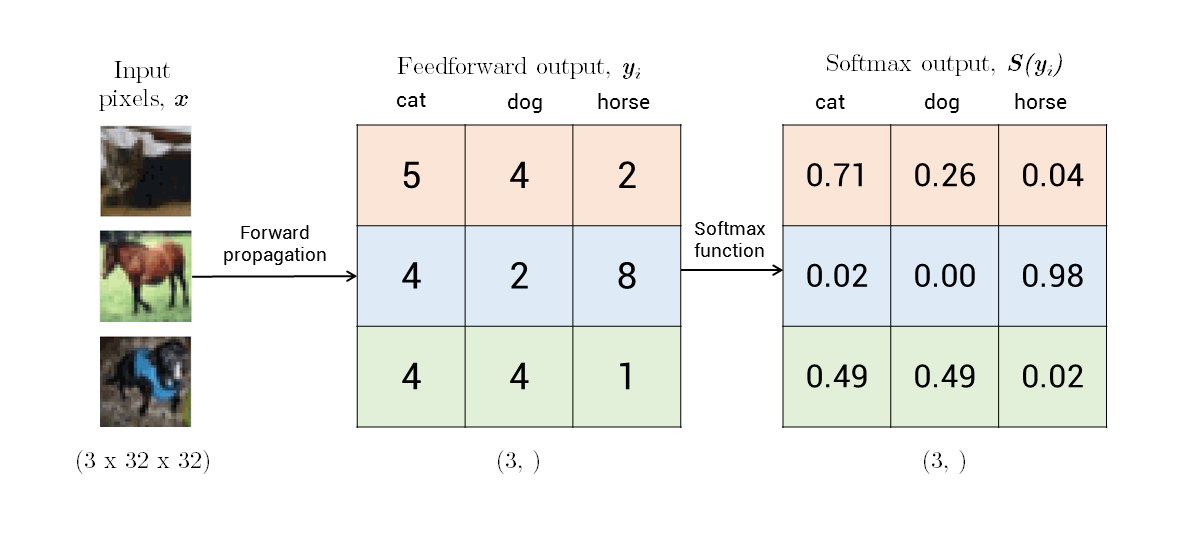

In [5]:
print('\npredict (after training) - softmax')
print('the probability of high price is {}'. format(F.softmax(neural_model2(torch.tensor([25.0, 15.0, 3000.0, 200.0, 1])), dim=0)[0]))
print('the probability of low price is {}'. format(F.softmax(neural_model2(torch.tensor([25.0, 15.0, 3000.0, 200.0, 1])), dim=0)[1]))


predict (after training) - softmax
the probability of high price is 0.5398789048194885
the probability of low price is 0.4601210951805115
